# Cabbage disese prediction

## Table of contents

1. About the dataset

2. Importing libraries

3. Exploratory data analysis

4. Data preprocessing

5. Model building

6. Model evaluation

## About the dataset:

Dataset include images of 'Alternaria', 'Bacterial_soft_rot' and 'Healthy' cabbage leaves. The images are collected from various internet sources.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install split-folders --quiet

## Importing necessary libraries

1. Using pandas library to load dataset and data processing

2. Numpy to work with arrays and matrices

3. Matplotlib for data visualization

4. Using splitfolders , splitting the data into train, test and validation dataset

5. Using tensorflow and keras libraries for model building and training.


In [ ]:
import pandas as pd
import numpy as np
#import splitfolders
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

* Before exploring the dataset splitting the data into training , testing and validation dataset. Since I am using tensorflows "image_dataset_from_directory" to load the images, they donot have an option to split the dataset into three directories, they provide only train and validation split. However, I would like to have train, test and validation split. And using splitfolder function to do the same.

* The splifolders function splits the data with respect to the ratios. Therefore it takes the input dataset directory , the destination directory to save the splitted datasets and the ratio of the split as parameters.

* Here, by passing the dataset directory into splitfolder function, splitting the data into train, test and validation dataset providing the ratio as 80% , 10% and 10% respectively and storing it in a new folder (dataset- foldername).

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/thesis_crop_dis_pre/cabbage", output="/content/drive/MyDrive/thesis_crop_dis_pre/cabbage/dataset_cab",
     ratio=(.8, .1, .1))

Copying files: 139 files [00:48,  2.86 files/s]


Image size and batch size are assigned with default values

In [ ]:
image_size = (256, 256)
batch_size = 32

## Exploratory data analysis

Since its an image data using tensorflows " image_dataset_from_directory " to load the datasets.

Loading the train data passing parameters such as

1. directory, which gives the path of the train data

2. labels is set to 'inferred' ( since i would like to have the same label names from the directory)

3. with lables_mode as int, encoding the labels as integers

4. using a default batch size ( 32 ) to train the data

5. providing default image size (256,256)

6. also providing image channel (color_node) as 3 ie., rgb

7. since we have seperate datasets for validation, here the validation_split is set to None


* image_size and batch_size values could be assigned to a variable since we make use of it again.

In [ ]:
df_train = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/cabbage/dataset_cab/train',
    labels='inferred',
    label_mode ='int',
    class_names=None,
    color_mode ='rgb',
    batch_size = batch_size,
    image_size = image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
)

Found 111 files belonging to 3 classes.


Since I have assigned the labels to inferred, we can get the list of class names using the method "class_names" and the names would match the subdirectory names of the data

In [ ]:
classes = df_train.class_names
classes

['Alternaria', 'Bacterial_soft_rot', 'Healthy']

In [ ]:
for image, label in df_train.take(2):
  print(image.numpy())
  print(label.numpy())

[[[[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]]

  [[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]]

  [[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]]

  ...

  [[123.01298   125.01298    77.2747   ]
   [135.        133.63086    90.73828  ]
   [128.47873   125.65451    87.06662  ]
   ...
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.        

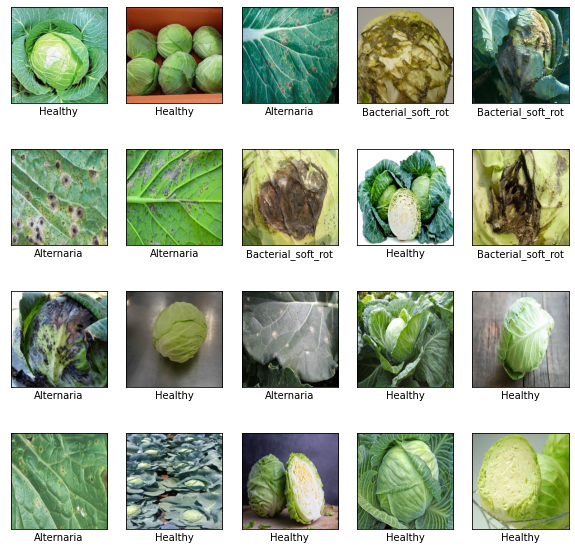

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

Loading validation and test dataset from the directory again through "image_dataset_from_directory" providing the default batch size and image size

In [ ]:
df_vali = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/cabbage/dataset_cab/val',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,
)

Found 12 files belonging to 3 classes.


In [ ]:
df_test = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/cabbage/dataset_cab/test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,)

Found 16 files belonging to 3 classes.


## Data preprocessing

Using tensorflows preprocessing layers

1. Resizing layers- used to change image length and widhth to (256,256)

2. Rescaling layers- to stanadradize the data

3. RandomZoom layers - to randomly zoom in or out on each axis of an image independently

In [ ]:
data_preprocessing = tf.keras.Sequential([

                                layers.experimental.preprocessing.Resizing(256,256),
                                layers.experimental.preprocessing.Rescaling(1./255, input_shape= (256,256,3)),
                                layers.experimental.preprocessing.RandomZoom(0.2)

                    ])

In [ ]:
data_augumentation = tf.keras.Sequential([
                                layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                layers.experimental.preprocessing.RandomRotation(0.2),

                    ])

Before using data augumentation on the dataset, I have tried to visualisize how it looks with this particular dataset

Using RandomFlip and RandomRotation layers

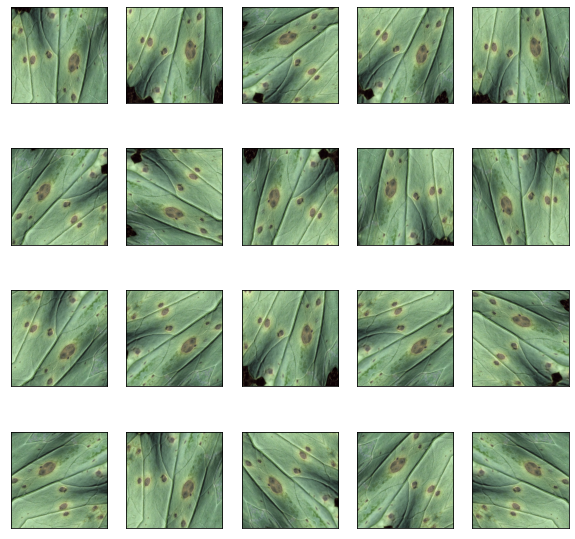

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    augmented_images = data_augumentation(image)
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[0].numpy().astype('int'), cmap=plt.cm.binary)
  plt.show()

## Model building

Within the sequential layers having

1. data_preprocessing as the first layer consisting of resizing, rescaling and randomzoom preprocessing layers

2. Secondly having stack of convolutional 2D and Maxpooling layers. In this case, using 4 layers of each ( tried different counts), the convolutional layers take filters to find the features of the images and its size which is given by the kernel_size and an activation function

* The first convolutional layer takes the input shape (256,256,3) which is image height, width and the rgb mode , 32 filters with size of 3* 3 and relu as its activation function. And the following convolutional layers take same kernel size and activation function but the filter value as 64

* Using maxpooling layers as it extracts the main and sharp features from the images providing size of 3 * 3

3. Within the dense network

* Having a flatten layer, which helps to reduce the dimensionality of the input to single dimension

In [ ]:
def check_opt(optimizers):

  model = models.Sequential([
    data_preprocessing,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dense(37, activation = 'softmax'),

    ])


  model.compile(optimizer= optimizers,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

  return model

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [ ]:
train_acc = []
val_acc = []
train_loss =[]
val_loss = []

Trying out the following five optimizers and storing it in an empty lists

Looping through all the optimizers and applying to the function

Using model.fit to train the training dataset and storing it in a variable. The fit model returns an history callback object which could be called to return the loss and accuracy values

Appending the final epoch results to the list. Here since I use only 5 epochs appending the fifth loss and accuracy value with index value 4



In [ ]:
for i in optimizers:
  model = check_opt(i)
  print('With optimizer:'+ i)


  history = model.fit(df_train, epochs= 5, batch_size = 32,validation_data= df_vali)

  train_acc.append(history.history['accuracy'][4])
  val_acc.append( history.history['val_accuracy'][4])

  train_loss.append(history.history['loss'][4])
  val_loss.append(history.history['val_loss'][4])

With optimizer:Adadelta
Epoch 1/5
4/4 [==============================] - 14s 3s/step - loss: 3.6087 - accuracy: 0.2072 - val_loss: 3.6176 - val_accuracy: 0.1667
Epoch 2/5
4/4 [==============================] - 9s 2s/step - loss: 3.6076 - accuracy: 0.2072 - val_loss: 3.6162 - val_accuracy: 0.1667
Epoch 3/5
4/4 [==============================] - 9s 2s/step - loss: 3.6043 - accuracy: 0.2072 - val_loss: 3.6148 - val_accuracy: 0.1667
Epoch 4/5
4/4 [==============================] - 9s 2s/step - loss: 3.6029 - accuracy: 0.2072 - val_loss: 3.6135 - val_accuracy: 0.1667
Epoch 5/5
4/4 [==============================] - 9s 2s/step - loss: 3.6050 - accuracy: 0.2072 - val_loss: 3.6121 - val_accuracy: 0.1667
With optimizer:Adagrad
Epoch 1/5
4/4 [==============================] - 9s 2s/step - loss: 3.5540 - accuracy: 0.0721 - val_loss: 3.4894 - val_accuracy: 0.4167
Epoch 2/5
4/4 [==============================] - 9s 2s/step - loss: 3.4853 - accuracy: 0.3694 - val_loss: 3.4099 - val_accuracy: 0.4167


In [ ]:
data = {'Optimizers': ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'], 'Training_accuracy': [train_acc[0],train_acc [1],train_acc [2],train_acc [3],train_acc [4]],
         'Training_loss': [train_loss[0],train_loss[1],train_loss[2],train_loss[3],train_loss[4]],
         'Validation_accuracy' : [val_acc[0],val_acc[1],val_acc[2],val_acc[3],val_acc[4]],

         'Validation_loss': [val_loss[0],val_loss[1],val_loss[2],val_loss[3],val_loss[4]],
                                                                                              }

df = pd.DataFrame(data)

In [ ]:
df

,Optimizers,Training_accuracy,Training_loss,Validation_accuracy,Validation_loss
0,Adadelta,0.207207,3.604986,0.166667,3.612076
1,Adagrad,0.396396,3.158702,0.416667,2.986845
2,Adam,0.252252,1.186702,0.416667,1.091377
3,RMSprop,0.459459,1.204498,0.333333,1.164194
4,SGD,0.396396,1.234197,0.500000,1.395111


In [ ]:
model = models.Sequential([
    data_preprocessing,
    data_augumentation,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu',padding ='same', input_shape=( 256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu',padding ='same'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu',padding ='same'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dropout(0.5),
    layers.Dense(3, activation = 'softmax'),

])
model.build(input_shape = (32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 85, 85, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 85, 85, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 28, 28, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer= 'Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [ ]:
#early_stop = EarlyStopping(monitor= 'val_loss',patience = 3, restore_best_weights= True)
#model_chk = ModelCheckpoint(filepath='/content/drive/MyDrive/thesis_crop_dis_pre/cabb_save_model.hdf5',monitor= 'val_loss',save_best_only= True)
#lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3, factor = 0.1)

In [ ]:
history = model.fit(df_train, epochs= 50, batch_size = 32, validation_data= df_vali)

Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 0.7669 - accuracy: 0.6667 - val_loss: 0.7129 - val_accuracy: 0.5833
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 0.6972 - accuracy: 0.6486 - val_loss: 0.7193 - val_accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 9s 2s/step - loss: 0.6649 - accuracy: 0.6937 - val_loss: 0.6802 - val_accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 9s 2s/step - loss: 0.7004 - accuracy: 0.6757 - val_loss: 0.7220 - val_accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 0.6096 - accuracy: 0.7568 - val_loss: 0.7550 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 9s 2s/step - loss: 0.5791 - accuracy: 0.7658 - val_loss: 0.6825 - val_accuracy: 0.5833
Epoch 7/50
4/4 [==============================] - 9s 2s/step - loss: 0.5949 - accuracy: 0.7387 - val_loss: 0.6541 - val_accuracy: 0.6667
Epoch 8/50
4/4 [=========================

## Model evaluation

* Evaluating the model by comparing the accuracy and loss in training and validation dataset using callback function(history) and visualizing with matplotlib

In [ ]:
train_accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

* Plotting training and validation accuracy and loss values with respect to each epochs


## Evaluating the test data


* Using evaluate method to evaluate the test datset and checking predicted and the actual label using predict function

Text(0, 0.5, 'Loss')

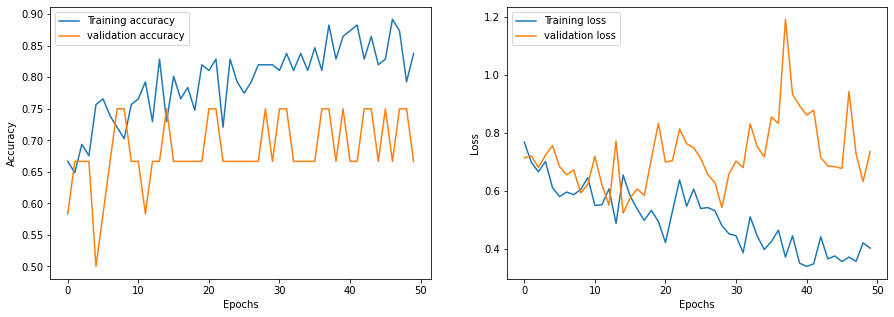

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(50),train_accu,label= 'Training accuracy')
plt.plot(range(50),val_accu,label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),train_loss,label= 'Training loss')
plt.plot(range(50),val_loss,label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
model.evaluate(df_test)

1/1 [==============================] - 3s 3s/step - loss: 0.7339 - accuracy: 0.6875


[0.7338912487030029, 0.6875]

actual label Alternaria
predicted_label Alternaria


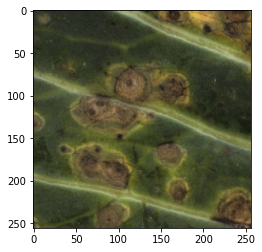

In [ ]:
for image, label in df_test.take(1):
  plt.imshow(image[1].numpy().astype('int'))
  print('actual label', classes[label[1]])

  prediction = model.predict(image)
  print('predicted_label',classes[np.argmax(prediction[1])] )

## Saving keras model

In [ ]:
save_path = '/content/drive/MyDrive/thesis_crop_dis_pre/cabb_save_model.hdf5'
model.save(save_path)

model = keras.models.load_model(save_path)